# Convolution and Smoothing

The goal of this notebook is to ensure that the convolution operation can be accurately executed on input images. The convolution kernel values will be restricted to positive integers 

In [2]:
from utils_encryptedDomain.homomorphic_operations import *
from utils_plaintextDomain.utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

In [3]:
a = np.array([100, 200, -100]).astype(np.int64)
b = np.array([0, -3, -2]).astype(np.int64)
c = encryptImage(a)
print(c)
p = encodeImage(b)
product = tensor_homomorphicScalarMultiplication(c, p)
print(decryptImage(product))

[1817256687 2391732213 4005128135]
[   0 -600  200]


In [4]:
# Normal Convolution
testImage = np.array([[0, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0]]).astype(np.int64)
testKernel = np.array([[1, 0, 1], [0, -1, 0], [1, 0, 1]]).astype(np.int64)
testOutput = convolve2D(testImage, testKernel)
print(testOutput)

[[1. 2. 1. 2. 1.]
 [1. 2. 2. 1. 1.]
 [1. 2. 1. 2. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]]


In [5]:
# Encrypted Convolution
encryptedTestImage = encryptImage(testImage)
encryptedTestOutput = encryptedConvolve2D(encryptedTestImage, testKernel)
decryptedTestOutput = decryptImage(encryptedTestOutput)

decryptedTestOutput

array([[1, 2, 1, 2, 1],
       [1, 2, 2, 1, 1],
       [1, 2, 1, 2, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0]], dtype=int64)

### Notice that the output results are identical; the convolution operation works in the encrypted domain!
### Let's test on an actual image

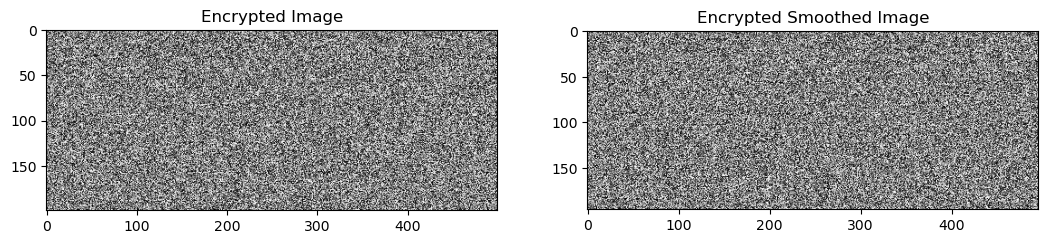

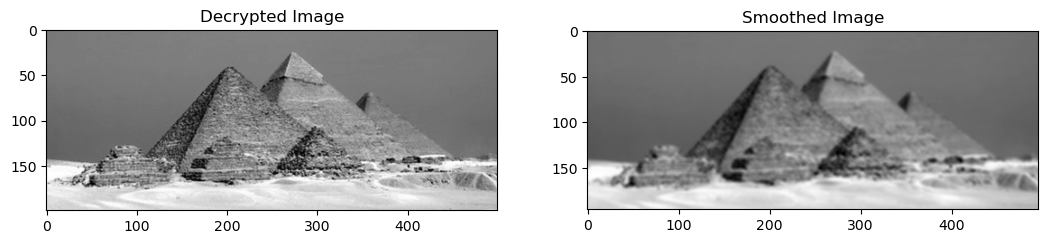

In [9]:
# Preparing the test image
pyramids = io.imread("images/pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(np.int64)
grayscale_pyramids = grayscale_pyramids[500:700, 100:600]
encryptedPyramids = encryptImage(grayscale_pyramids)

testKernel = np.array([[1, 1, 1, 1, 1], [1, 2, 2, 2, 1], [1, 2, 3, 2, 1], [1, 2, 2, 2, 1], [1, 1, 1, 1, 1]]).astype(np.int64)
encryptedSmoothedPyramids = encryptedConvolve2D(encryptedPyramids, testKernel)

show_images([encryptedPyramids, encryptedSmoothedPyramids], ["Encrypted Image", "Encrypted Smoothed Image"])
show_images([decryptImage(encryptedPyramids), decryptImage(encryptedSmoothedPyramids)], ["Decrypted Image", "Smoothed Image"])

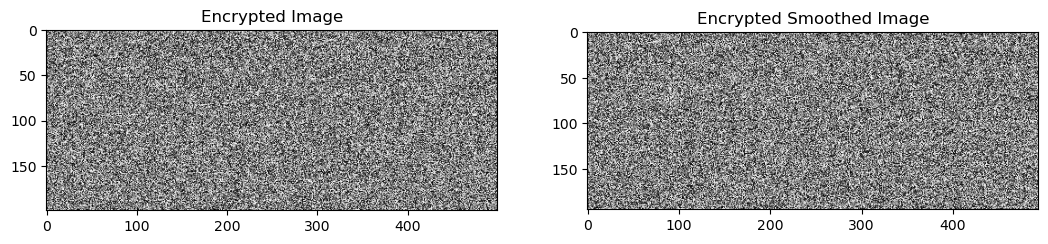

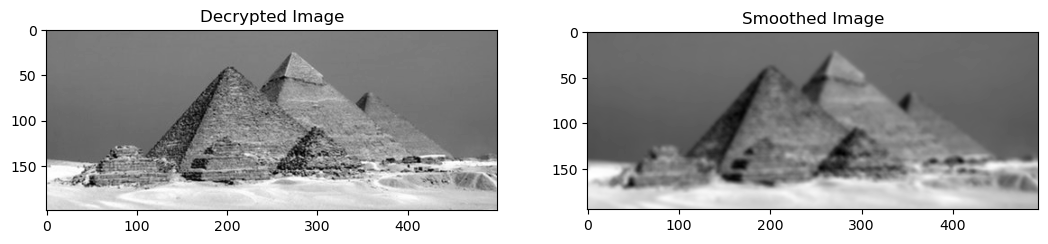

In [10]:
# Normal Convolution
testKernel = np.array([[1, 1, 1, 1, 1, 1, 1],
                       [1, 2, 2, 2, 2, 2, 1],
                       [1, 2, 3, 3, 3, 2, 1],
                       [1, 2, 3, 4, 3, 2, 1],
                       [1, 2, 3, 3, 3, 2, 1],
                       [1, 2, 2, 2, 2, 2, 1],
                       [1, 1, 1, 1, 1, 1, 1]]).astype(np.int64)
encryptedSmoothedPyramids = encryptedConvolve2D(encryptedPyramids, testKernel)

show_images([encryptedPyramids, encryptedSmoothedPyramids], ["Encrypted Image", "Encrypted Smoothed Image"])
show_images([decryptImage(encryptedPyramids), decryptImage(encryptedSmoothedPyramids)], ["Decrypted Image", "Smoothed Image"])

## Gaussian Filters

When dealing with images containing decimal values, one would first need to multiply the filter by a (relatively) large integer, then cast its values to integers. This creates some approximation error, but is acceptable if the sigma value of the Gaussian Kernel is small enough

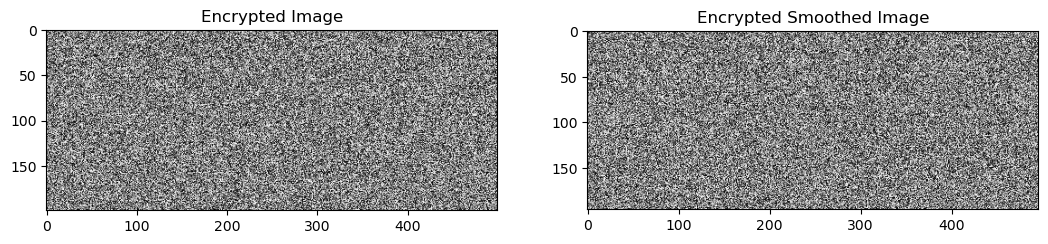

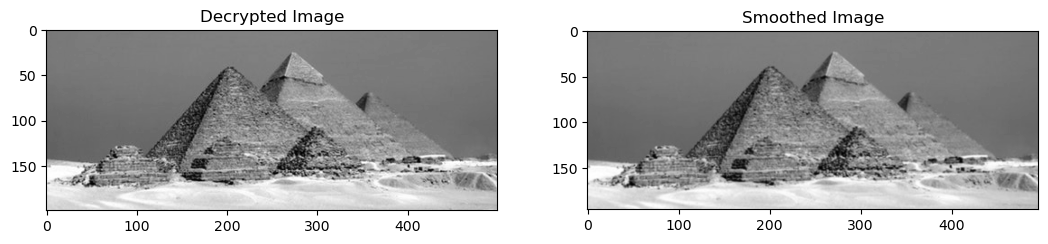

In [16]:
testKernel = generate_gaussian_kernel(sigma = 0.5)
testKernel = (testKernel * 100).astype(np.int64)
encryptedSmoothedPyramids = encryptedConvolve2D(encryptedPyramids, testKernel)

show_images([encryptedPyramids, encryptedSmoothedPyramids], ["Encrypted Image", "Encrypted Smoothed Image"])
show_images([decryptImage(encryptedPyramids), decryptImage(encryptedSmoothedPyramids)], ["Decrypted Image", "Smoothed Image"])

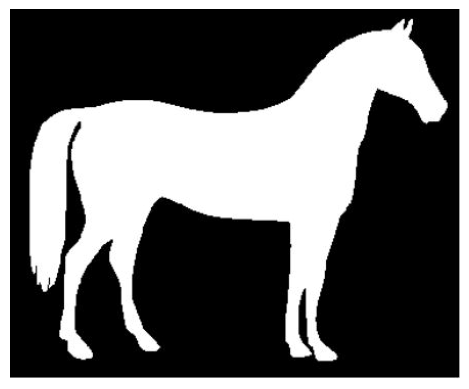

In [12]:
# Preparing the test image
horse = io.imread("images/horse.jpg")
grayscale_horse = (rgb2gray(horse) * 255).astype(np.int64)
#grayscale_cufe = grayscale_cufe[500:700, 100:600]
# Display the image
plt.imshow(grayscale_horse, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

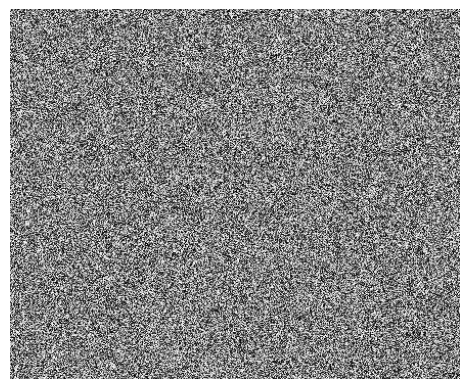

In [13]:
encryptedHorse = encryptImage(grayscale_horse)
plt.imshow(encryptedHorse, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

### As we can see, convolution was executed successfully in the encrypted domain.
### Try out different images and filters!